### 练习一： 线性回归
原文的练习要求[在这里](ex1.pdf),要求用m文件进行编写。该练习使用python进行编程，为对更好的进行练习，没有完全和原代码进行想适应。

### 1.1 单变量下的线性回归练习 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

 问题描述：
> * 在这个练习的这一部分，你将用一个变量来实现线性回归来预测食物卡车的利润。 假设你是一家餐馆特许经营的首席执行官，并正在考虑在不同的城市开设一个新的出路。 这个连锁店在各个城市都有卡车，而且你有来自城市的利润和人口数据。 
> * 你想使用这些数据来帮助您选择要扩展到下一个城市。  
> * 文件ex1data1.txt包含我们的线性回归问题的数据集。 第一列是一个城市的人口，第二列是该城市食品卡车的利润。 盈利的负值表示亏损。 

####  1.1.1 分析数据并绘图   
这里我们选取已有的数据集进行练习，并打印出描述信息进行初步分析以及绘图描述。

In [2]:
data = pd.read_csv("ex1data1.txt",header=None,names=["Population","Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


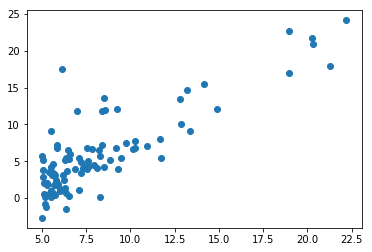

In [4]:
plt.scatter(data["Population"],data["Profit"])

#### 1.1.2 计算损失函数

使用梯度下降方式来实现线性回归，以用来达到最小化成本函数。   
首先，创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [5]:
def computeCost(X, y, theta):
    inner = np.power((X.dot(theta) - y), 2)
    return np.sum(inner) / (2 * len(X))

为了能够更好使用向量化的解决方案计算代价和梯度，这里增添一列。

In [6]:
data.insert(0,'Ones',1)

现在，我们提取X，y信息，并且返回矩阵信息。  
这里写出通式。

In [7]:
def extract_data(data):
    cols = data.shape[1]
    X = np.array(data.iloc[:,0:cols-1])
    y = np.array(data.iloc[:,cols-1:cols])
    return X,y
X,y = extract_data(data) 
print("X shapes:%s,y shapes:%s"%(X.shape,y.shape))

X shapes:(97L, 2L),y shapes:(97L, 1L)


初始化一下参数，并计算一下初始代价函数。

In [8]:
theta = np.zeros((2,1))
print computeCost(X,y,theta)

32.0727338775


#### 1.1.3 批量梯度下降
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [9]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    parameters = int(theta.ravel().shape[0])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X.dot(theta) - y    
        for j in range(parameters):
            reshape_X = X[:,j].reshape(X.shape[0],1)
            term = np.multiply(error,reshape_X)
            temp[j] = theta[j] - ((alpha / len(X)) * np.sum(term))    
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
        theta_re = theta.reshape(-1)

    return theta_re, cost

初始化一下参数，看看效果

In [10]:
alpha=0.01
iters = 1000
theta,cost =gradientDescent(X,y,theta,alpha,iters)
print theta

[-3.24140214  1.1272942 ]


#### 1.1.4 可视化效果

Text(0.5,1,u'Single Varible linear_regression')

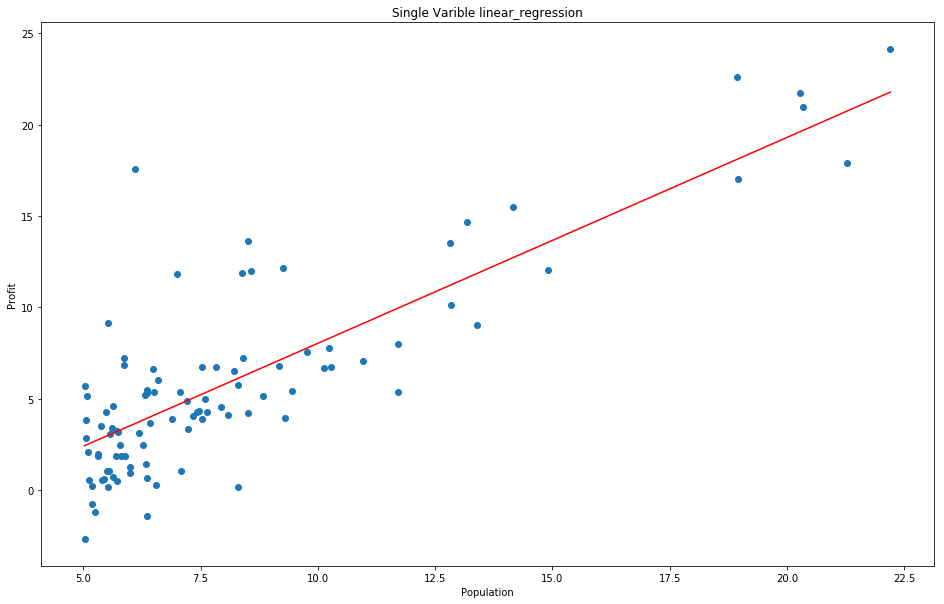

In [11]:
x = np.linspace(data["Population"].min(),data["Population"].max(),100)
pre_y = theta[0]+(theta[1]*x)
plt.figure(figsize=(16,10))
plt.plot(x,pre_y,"r")
plt.scatter(data["Population"],data["Profit"])
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Single Varible linear_regression")

当然我们也可以看看Loss

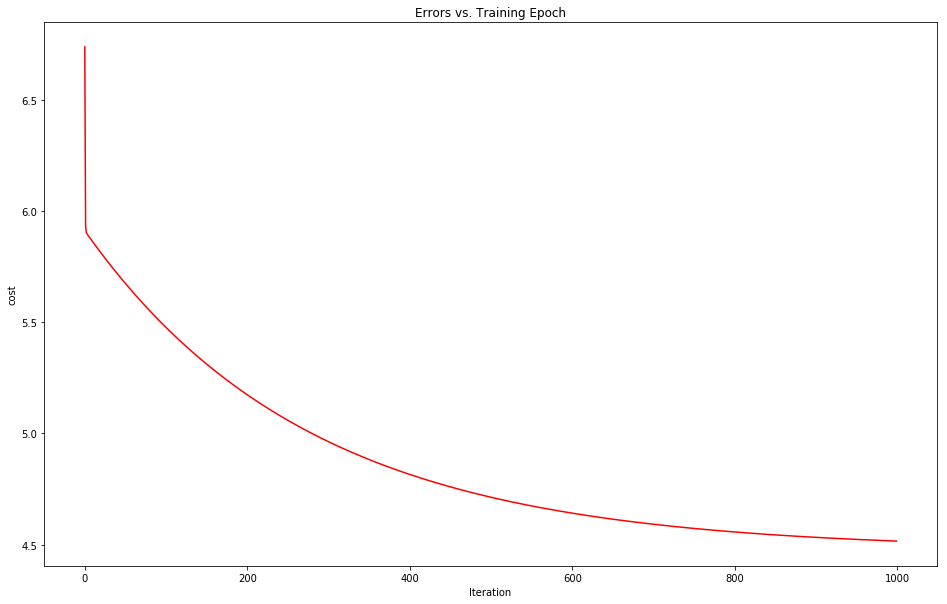

In [12]:
def plot_loss(cost):
    plt.figure(figsize=(16,10))
    plt.plot(cost,"r")
    plt.xlabel("Iteration")
    plt.ylabel("cost")
    plt.title("Errors vs. Training Epoch")
plot_loss(cost)

### 1.2 多变量线性回归

问题描述：
> * 在这一部分中，您将实施具有多个变量的线性回归来预测房屋的价格。 假设你正在卖你的房子，你想知道一个好的市场价格是多少。 要做到这一点的一个方法是首先收集最近出售房屋的信息，并制定房价模型。
> * 文件ex1data2.txt包含俄勒冈州波特兰的一套房屋价格。 第一列是房子的大小（以平方英尺为单位），第二列是卧室的数量，第三列是房子的价格。

在这里我们将进行相关的练习

In [13]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


可以看到这里的两个变量（房子的尺寸和房间数目）的数值上差距太大，若直接使用数据进行分析，将会产生单个变量的影响值大。为此，在进行之前，我们将对数据进行归一化预处理。

In [14]:
## 进行归一化操作
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [15]:
data2.insert(0,"Ones",1)
X2,y2 = extract_data(data2)
theta2 = np.zeros((3,1))

同样，我们使用前面定义好的梯度下降方法进行迭代求解

In [16]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [17]:
print g2

[ -1.10868761e-16   8.78503652e-01  -4.69166570e-02]


画出loss函数

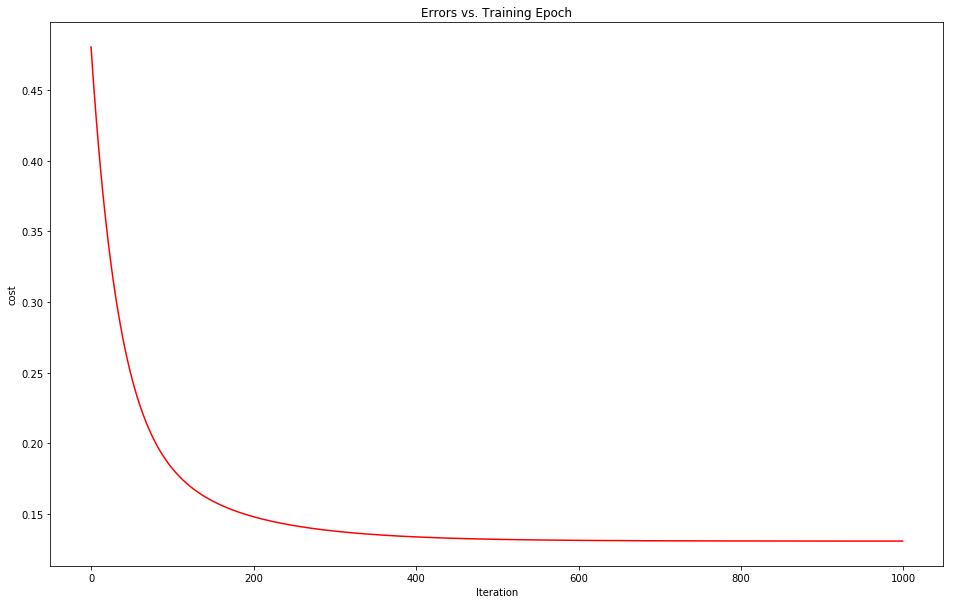

In [18]:
plot_loss(cost2)

### 1.3  normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型